Nama:

In [1]:
print("Nama : Hanun Masitha Ramadhani")

Nama : Hanun Masitha Ramadhani


(1) Import dataset credit card application. Jadikan kolom 'status' menjadi kolom target, dengan accepted = 1, not accepted = 0.

In [6]:
import pandas as pd
df_application = pd.read_csv('cc_application.csv')
df_application

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,5150482,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25124,5150483,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25125,5150484,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,13,1
25126,5150485,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,2,1


(2) Periksa adanya missing value pada dataset, dan lakukan dropna apabila sedikit jumlahnya.

In [9]:
missing = []
persen = []

for i in df_application.columns:
    missing.append(df_application[i].isnull().sum())
    persen.append(df_application[i].isnull().sum()/len(df_application[i])*100)

proporsi_hilang = pd.DataFrame({
        'kolom' : df_application.columns,
        'missing' : missing,
        'persen_missing' : persen
})
    
proporsi_hilang

,kolom,missing,persen_missing
0,Applicant_ID,0,0.0
1,Applicant_Gender,0,0.0
2,Owned_Car,0,0.0
3,Owned_Realty,0,0.0
4,Total_Children,0,0.0
5,Total_Income,0,0.0
6,Income_Type,0,0.0
7,Education_Type,0,0.0
8,Family_Status,0,0.0
9,Housing_Type,0,0.0


In [12]:
y = df_application['Status']
x = df_application.drop(['Status'], axis = 1)

(3) Lakukan train test split, test:test = 4:1, stratify = y.

In [14]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

print("Jumlah Data Train : {0}".format(len(X_train)))
print("Jumlah Data Test : {0}".format(len(X_test)))

Jumlah Data Train : 20102
Jumlah Data Test : 5026


(4) Lakukan transformasi pada X_train apabila diperlukan (imputation/onehotencoding). Lakukan transformasi serupa pada X_test tanpa melakukan fitting kembali.

In [18]:
X_train_obj = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes('number')
X_train_obj

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
18548,F,State servant ...,Higher education ...,Widow ...,House / apartment ...,Core staff ...
8048,F,Commercial associate ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,Sales staff ...
10909,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
16679,F,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Managers ...
21997,M,Working ...,Higher education ...,Married ...,House / apartment ...,Security staff ...
...,...,...,...,...,...,...
1454,F,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
24529,F,Working ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,Sales staff ...
16995,M,Working ...,Incomplete higher ...,Single / not married ...,House / apartment ...,Laborers ...
17840,F,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Accountants ...


In [27]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
oe.fit(X_train_obj)
X_train_obj_transform = oe.transform(X_train_obj)

X_train_obj_transform = pd.DataFrame(X_train_obj_transform)
X_train_obj_transform.columns = X_train_obj.columns
X_train_obj_transform

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
0,0.0,2.0,1.0,4.0,1.0,3.0
1,0.0,0.0,4.0,0.0,1.0,14.0
2,0.0,4.0,4.0,1.0,1.0,3.0
3,0.0,0.0,4.0,1.0,1.0,10.0
4,1.0,4.0,1.0,1.0,1.0,16.0
...,...,...,...,...,...,...
20097,0.0,0.0,4.0,1.0,1.0,3.0
20098,0.0,4.0,4.0,0.0,1.0,14.0
20099,1.0,4.0,2.0,3.0,1.0,8.0
20100,0.0,0.0,4.0,1.0,1.0,0.0


In [28]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
num_minmax_scaled = minmax_scaler.fit_transform(X_train_num)

num_minmax_scaled = pd.DataFrame(num_minmax_scaled)
num_minmax_scaled.columns = X_train_num.columns
num_minmax_scaled

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,0.744726,0.0,0.0,0.0,0.122093,0.0,0.0,1.0,0.0,0.000000,0.638298,0.255814,0.0,0.033333
1,0.299466,0.0,0.0,0.2,0.069767,0.0,0.0,0.0,0.0,0.333333,0.319149,0.000000,0.0,0.100000
2,0.411190,1.0,1.0,0.4,0.273256,0.0,0.0,0.0,0.0,0.500000,0.425532,0.279070,0.0,0.066667
3,0.646087,1.0,0.0,0.2,0.069767,0.0,0.0,0.0,0.0,0.333333,0.148936,0.023256,0.0,0.033333
4,0.895701,1.0,1.0,0.0,0.127907,0.0,0.0,0.0,0.0,0.166667,0.787234,0.023256,0.0,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20097,0.089364,0.0,1.0,0.0,0.040698,0.0,0.0,0.0,0.0,0.166667,0.042553,0.023256,0.0,0.066667
20098,0.991565,1.0,1.0,0.2,0.127907,0.0,0.0,0.0,0.0,0.333333,0.468085,0.000000,0.0,0.166667
20099,0.680814,0.0,1.0,0.0,0.098837,0.0,0.0,0.0,1.0,0.000000,0.170213,0.000000,0.0,0.066667
20100,0.735967,1.0,1.0,0.2,0.055233,0.0,0.0,0.0,0.0,0.333333,0.340426,0.255814,0.0,0.416667


In [29]:
X_train_enc = pd.concat([X_train_obj_transform,num_minmax_scaled], axis=1)

c:\users\hanun\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    20007
0       95
Name: Status, dtype: int64


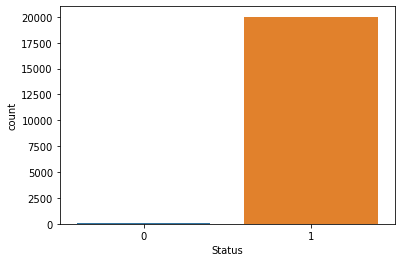

In [30]:
import seaborn as sns

sns.countplot(y_train)
print(y_train.value_counts())

In [31]:
# SMOTE
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=500)

X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train)

print(f'''Shape of X before SMOTE: {X_train_enc.shape}
Shape of X after SMOTE: {X_train_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))


Shape of X before SMOTE: (20102, 20)
Shape of X after SMOTE: (40014, 20)

Balance of positive and negative classes (%):
After OverSampling, counts of label '1': 20007
After OverSampling, counts of label '0': 20007


In [32]:
X_test_obj = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')
X_test_obj

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
422,M,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Drivers ...
20453,F,Commercial associate ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,Cleaning staff ...
2437,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Laborers ...
12192,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
1300,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Cooking staff ...
...,...,...,...,...,...,...
23960,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Security staff ...
22500,F,Working ...,Higher education ...,Married ...,House / apartment ...,Accountants ...
19490,M,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Drivers ...
14645,F,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,Cooking staff ...


In [33]:
X_test_obj_transform = oe.transform(X_test_obj)

X_test_obj_transform = pd.DataFrame(X_test_obj_transform)
X_test_obj_transform.columns = X_test_obj.columns
X_test_obj_transform

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
0,1.0,0.0,4.0,1.0,1.0,4.0
1,0.0,0.0,4.0,0.0,1.0,1.0
2,1.0,4.0,4.0,1.0,1.0,8.0
3,1.0,4.0,4.0,1.0,1.0,3.0
4,0.0,4.0,4.0,1.0,1.0,2.0
...,...,...,...,...,...,...
5021,0.0,4.0,4.0,1.0,1.0,16.0
5022,0.0,4.0,1.0,1.0,1.0,0.0
5023,1.0,0.0,4.0,1.0,1.0,4.0
5024,0.0,0.0,4.0,1.0,1.0,2.0


In [35]:
num_minmax_scaled = minmax_scaler.transform(X_test_num)

num_minmax_scaled = pd.DataFrame(num_minmax_scaled)
num_minmax_scaled.columns = X_test_num.columns
num_minmax_scaled

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
0,0.004821,1.0,0.0,0.0,0.154519,0.0,1.0,0.0,1.0,0.166667,0.244444,0.071429,0.000000,0.266667
1,0.774211,0.0,1.0,0.0,0.104956,0.0,0.0,0.0,0.0,0.166667,0.666667,0.047619,0.000000,0.066667
2,0.102349,1.0,0.0,0.2,0.125364,0.0,0.0,0.0,0.0,0.333333,0.155556,0.119048,0.000000,0.250000
3,0.426986,0.0,1.0,0.0,0.081633,0.0,0.0,0.0,0.0,0.166667,0.466667,0.071429,0.145833,0.183333
4,0.068362,1.0,1.0,0.0,0.037901,0.0,1.0,1.0,0.0,0.166667,0.666667,0.047619,0.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,0.970411,0.0,0.0,0.0,0.023324,0.0,1.0,0.0,0.0,0.166667,0.622222,0.238095,0.000000,0.716667
5022,0.908196,0.0,0.0,0.2,0.081633,0.0,0.0,1.0,0.0,0.333333,0.355556,0.166667,0.000000,0.600000
5023,0.762261,1.0,0.0,0.2,0.169096,0.0,0.0,0.0,0.0,0.333333,0.511111,0.071429,0.000000,0.166667
5024,0.582515,0.0,1.0,0.0,0.067055,0.0,0.0,1.0,0.0,0.166667,0.200000,0.071429,0.000000,0.166667


In [38]:
X_test_enc = pd.concat([X_test_obj_transform,num_minmax_scaled], axis=1)

1    5000
0      26
Name: Status, dtype: int64


c:\users\hanun\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


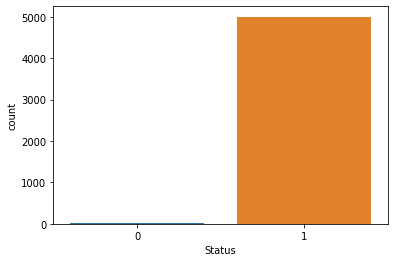

In [37]:
sns.countplot(y_test)
print(y_test.value_counts())

In [40]:
X_test_sm, y_test_sm = sm.fit_resample(X_test_enc, y_test)

print(f'''Shape of X before SMOTE: {X_test_enc.shape}
Shape of X after SMOTE: {X_test_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
print("After OverSampling, counts of label '1': {}".format(sum(y_test_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_sm==0)))


Shape of X before SMOTE: (5026, 20)
Shape of X after SMOTE: (10000, 20)

Balance of positive and negative classes (%):
After OverSampling, counts of label '1': 5000
After OverSampling, counts of label '0': 5000


(5) Lakukan cross-validation dengan estimator Decision Tree dengan untuk menentukan nilai optimal untuk berbagai hyperparameter. Print classification report untuk trainset dan testset (default vs optimized). Tampilkan tree plot dari model decision tree dengan optimized hyperparameter (figsize silah diatur agar tidak terlalu membesarkan ukuran notebook). Apakah optimisasi meningkatkan performansi dari model?

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth':[5,6,8],
             'min_samples_split':[14, 30],
             'min_samples_leaf':[20,30],
             'max_features':[5,8]}
gscv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

gscv.fit(X_train_sm, y_train_sm)
best_param = gscv.best_params_

In [47]:
best_param

{'max_depth': 8,
 'max_features': 8,
 'min_samples_leaf': 30,
 'min_samples_split': 14}

In [48]:
tree_opt = DecisionTreeClassifier(max_depth=best_param['max_depth'],
                       min_samples_split=best_param['min_samples_split'],
                       min_samples_leaf=best_param['min_samples_leaf'],
                       max_features=best_param['max_features'])

In [49]:
tree = DecisionTreeClassifier()

In [51]:
tree.fit(X_train_sm, y_train_sm)
tree_opt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=8, max_features=8, min_samples_leaf=30,
                       min_samples_split=14)

In [52]:
y_pred_test_pred_d = tree.predict(X_test_sm)
y_pred_test_pred_o = tree_opt.predict(X_test_sm)

In [53]:
from sklearn.metrics import classification_report

print('Result of Testing Datast with optimized parameter')
print(classification_report(y_test_sm, y_pred_test_pred_o, labels=[1,0]))

Result of Testing Datast with optimized parameter
              precision    recall  f1-score   support

           1       1.00      0.99      1.00      5000
           0       0.99      1.00      1.00      5000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [54]:
print('Result of Testing Datast without optimized parameter')
print(classification_report(y_test_sm, y_pred_test_pred_d, labels=[1,0]))

Result of Testing Datast without optimized parameter
              precision    recall  f1-score   support

           1       0.91      1.00      0.95      5000
           0       1.00      0.91      0.95      5000

    accuracy                           0.95     10000
   macro avg       0.96      0.95      0.95     10000
weighted avg       0.96      0.95      0.95     10000



In [68]:
from sklearn.metrics import f1_score

print("F1 Score Data with optimized parameter : {}".format(f1_score(y_test_sm, y_pred_test_pred_o, average='weighted')))
print("F1 Score Data without optimized parameter : {}".format(f1_score(y_test_sm, y_pred_test_pred_d, average='weighted')))


F1 Score Data with optimized parameter : 0.9950999007729908
F1 Score Data without optimized parameter : 0.951496472129973


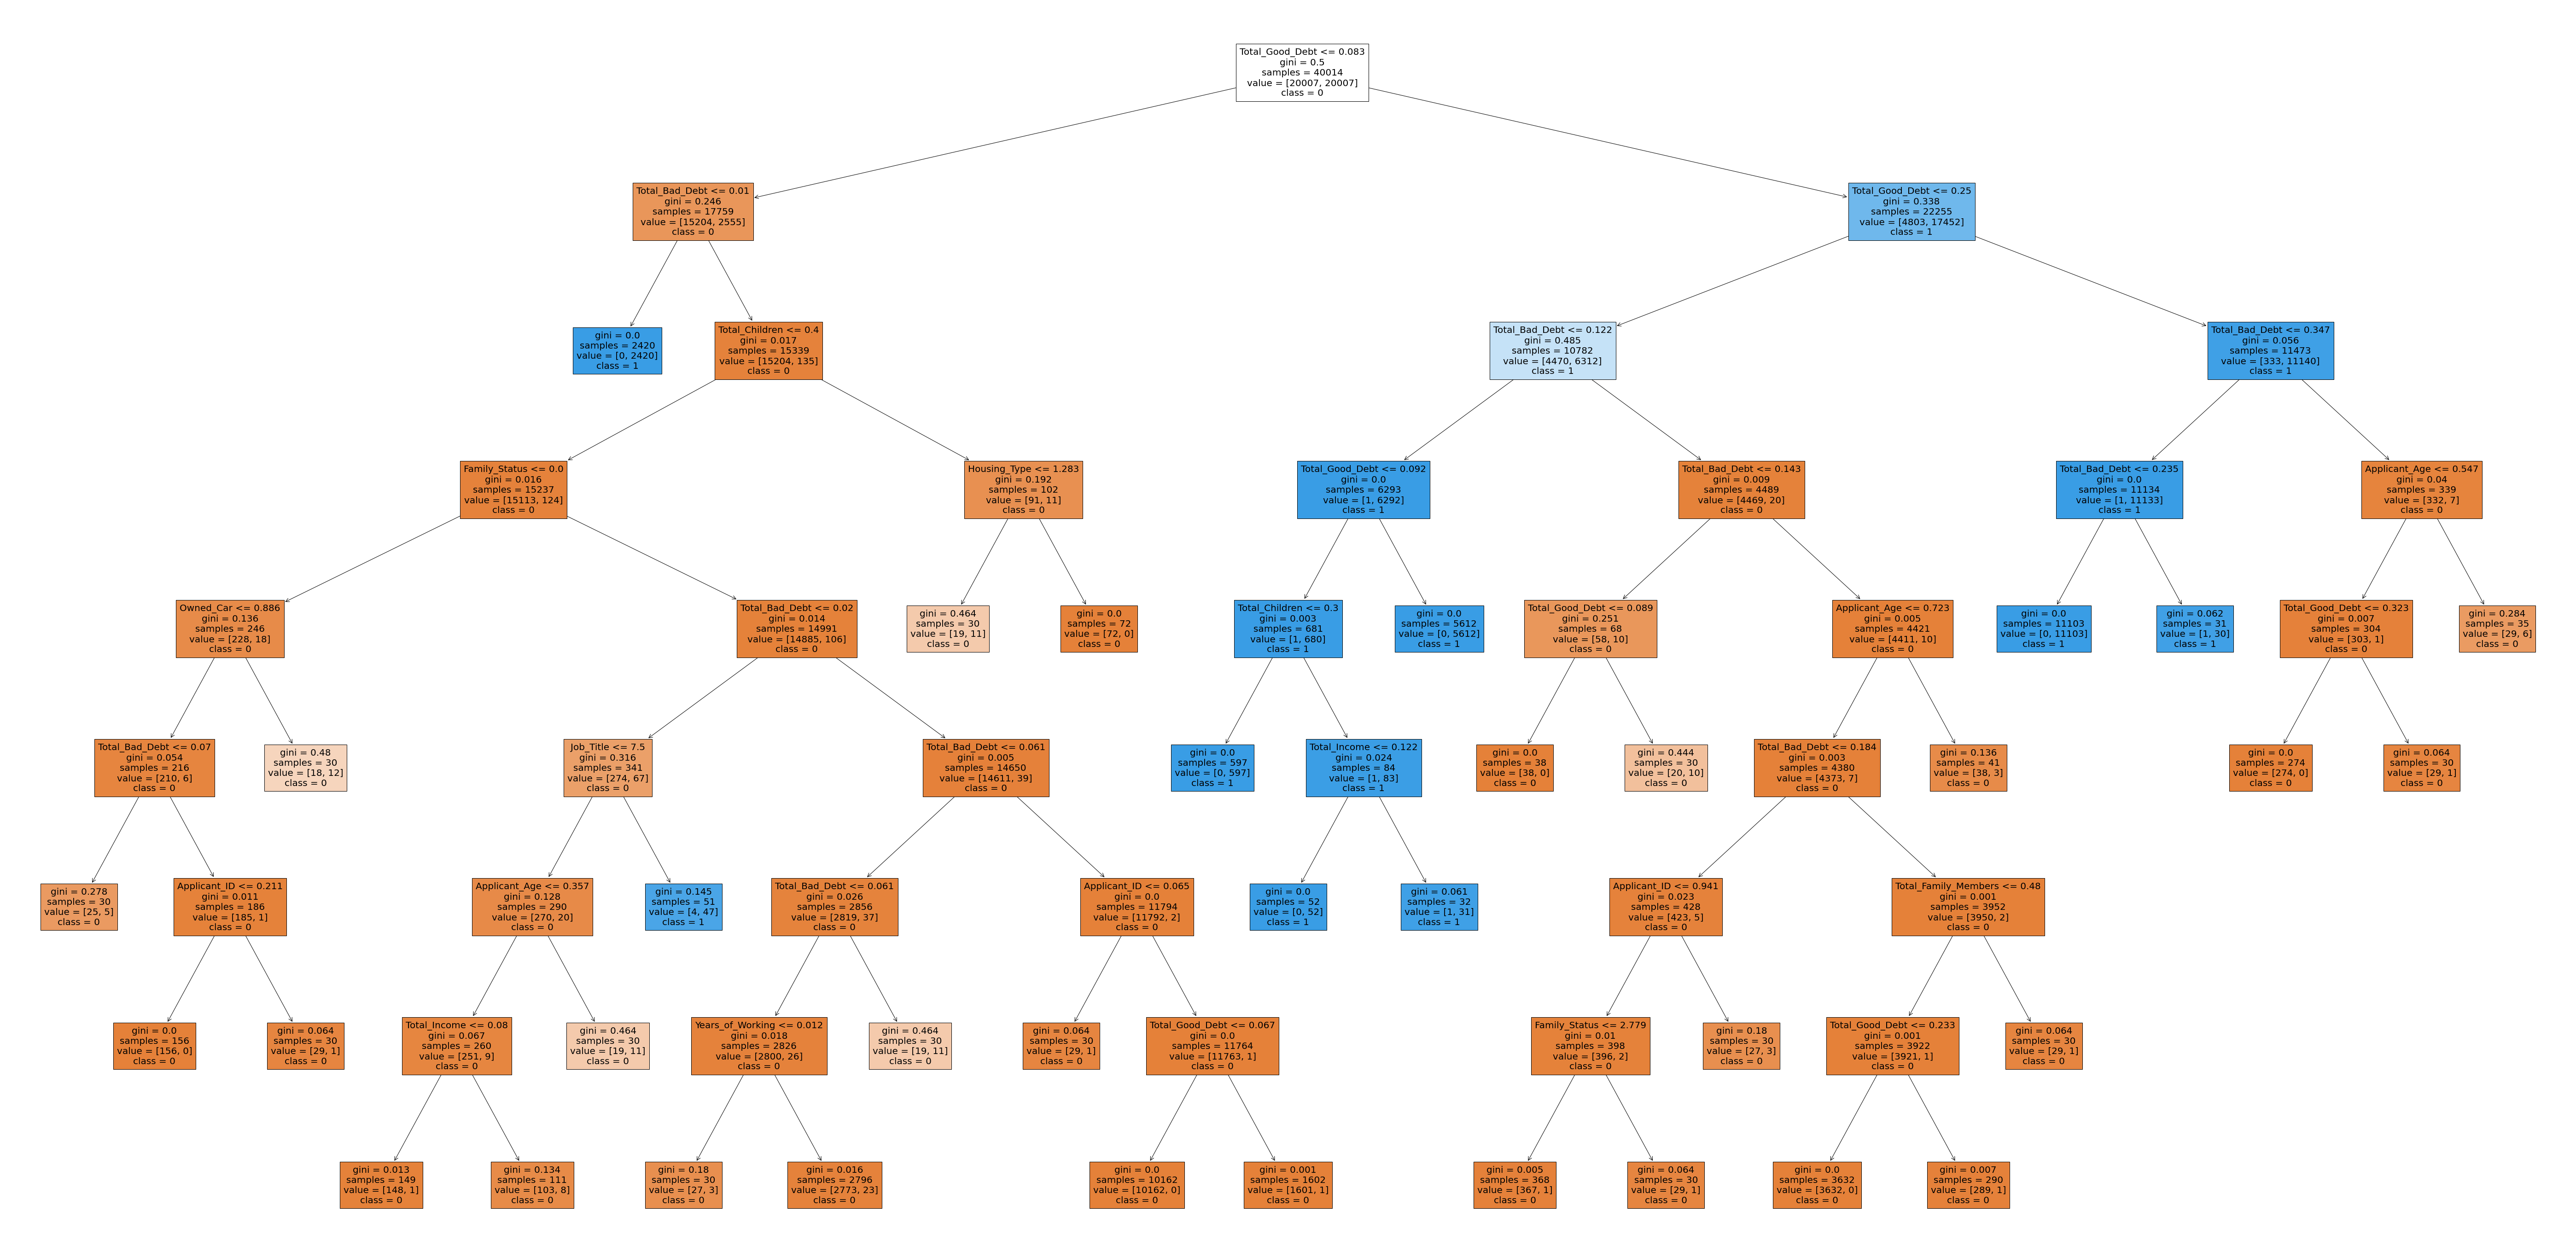

In [59]:
import matplotlib.pyplot as plt
from sklearn import tree as tr

plt.figure(figsize=(100,50))
tr.plot_tree(tree_opt, filled=True, feature_names=X_train_sm.columns, class_names=['0', '1'])
plt.savefig('tree_opt.jpg')
plt.show()

Pada Decision tree, penggunaan hyperparameter terbukti dapat meningkatkan akurasi dan f1 score model. hal ini dapat dilihat dari nilai akurasi setelah penggunaan hyperparameter yang meningkat sebesar 0.05. hal akhir yang dihasilkan juga hampir mendekati nilai 1.

(6) Lakukan cross-validation dengan estimator Random Forest dengan untuk menentukan nilai optimal untuk berbagai hyperparameter. Print classification report untuk trainset dan testset (default vs optimized). Apakah optimisasi meningkatkan performansi dari model?

In [61]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [40, 80],
             'max_samples': [0.3, 0.5],
             'max_depth':[5,6,8],
             'min_samples_split':[14, 30],
             'min_samples_leaf':[5,10],
             'max_features':[5,8]}
gscv = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

gscv.fit(X_train_sm, y_train_sm)
best_param_rf = gscv.best_params_

In [63]:
best_param_rf

{'max_depth': 8,
 'max_features': 8,
 'max_samples': 0.5,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 40}

In [62]:
rf_opt = RandomForestClassifier(**best_param_rf)
rf_opt.fit(X_train_sm, y_train_sm)
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

y_pred_test_def = rf.predict(X_test_sm)
y_pred_test_opt = rf_opt.predict(X_test_sm)

In [64]:
print('Result of Testing Datast with optimized parameter')
print(classification_report(y_test_sm, y_pred_test_opt, labels=[1,0]))

Result of Testing Datast with optimized parameter
              precision    recall  f1-score   support

           1       1.00      0.99      1.00      5000
           0       0.99      1.00      1.00      5000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [65]:
print('Result of Testing Datast without optimized parameter')
print(classification_report(y_test_sm, y_pred_test_def, labels=[1,0]))

Result of Testing Datast without optimized parameter
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5000
           0       1.00      1.00      1.00      5000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [67]:
from sklearn.metrics import f1_score

print("F1 Score Data with optimized parameter : {}".format(f1_score(y_test_sm, y_pred_test_opt, average='weighted')))
print("F1 Score Data without optimized parameter : {}".format(f1_score(y_test_sm, y_pred_test_def, average='weighted')))


F1 Score Data with optimized parameter : 0.9952998961747066
F1 Score Data without optimized parameter : 0.9978999952749893


Pada random forest akan mendapatkan hasil yang sama untuk model yang menggunakan hyperparameter dan tidak menggunakan hyperparameter. hal ini bisa terjadi mungkin karena parameter yang digunakan sebagai default pada random forest tidak jauh berbeda dengan parameter yang dipilih dari hyperparameter

(7) Dari hasil performansi yang Anda dapatkan manakah estimator yang cocok untuk dataset ini?

Dari percobaan menggunakan Decision tree dan Random forest dapat disimpulkan bahwa hasil dari random forest lebih baik dan optimal dari pada decision tree. hal ini dikarenakan hasil akurasi dan f1 score pada random forest lebih baik dari pada decision tree